# Homework 5 & 6: Regression and Logistic Regression, Optimization Problem

## HW 5

In [32]:
!pip install pandas

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

In [67]:
from sklearn.preprocessing import StandardScaler

# Step 1: 读取 CSV 文件
df = pd.read_csv('heart.csv')

# 将pd->np格式的数组
X = df.drop(columns="target").values
y = df['target']


# Step 2: 划分训练集和测试集（80%/20%）
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#X = pd.DataFrame(X_scaled, columns=df.drop(columns='target').columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=103/303, random_state=42)

In [35]:
model = LogisticRegression(max_iter=1000)  # 增加迭代次数以避免收敛警告
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [36]:
print("Model coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")

Model coefficients:
age: 0.0219
sex: -1.0896
cp: 0.8885
trestbps: -0.0085
chol: -0.0009
fbs: 0.1406
restecg: 0.4980
thalach: 0.0184
exang: -0.8572
oldpeak: -0.4815
slope: 0.7509
ca: -1.3712
thal: -1.2199


In [37]:
coef_series = pd.Series(model.coef_[0], index=X.columns)
top3_features = coef_series.abs().sort_values(ascending=False).head(3) # Choose the coefficient with biggest absolute value
print("\nTop 3 significant features:")
print(top3_features)


Top 3 significant features:
ca      1.371178
thal    1.219948
sex     1.089609
dtype: float64


In [38]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy
print(f"\nTest Error: {test_error:.4f}")


Test Error: 0.1942


In [39]:
cv_errors = 1 - cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
cv_error_mean = np.mean(cv_errors)
print(f"5-Fold CV Error: {cv_error_mean:.4f}")

5-Fold CV Error: 0.1500


In [40]:
print("\nComparison:")
if test_error < cv_error_mean:
    print("Test error is lower than CV error (possible overfitting).")
elif test_error > cv_error_mean:
    print("Test error is higher than CV error (possible underfitting or bad split).")
else:
    print("Test error and CV error are similar.")


Comparison:
Test error is higher than CV error (possible underfitting or bad split).


## Stepwise Forward Selection

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# 加载 heart.csv
df = pd.read_csv("heart.csv")

# 分离特征与标签
X = df.drop(columns=['target'])  # 特征
y = df['target']                 # 标签

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X = pd.DataFrame(X_scaled, columns=df.drop(columns='target').columns)

# 拆分训练和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=103/303, random_state=42)


In [27]:
# Estimate the 5-fold cross-validation error of s
def error_estimate(X, y, selected_features):
    model = LogisticRegression(penalty=None, max_iter=1000)
    X_subset = X[selected_features]
    cv_error = 1 - np.mean(cross_val_score(model, X_subset, y, cv=5, scoring='accuracy')) # k=5
    return cv_error


In [28]:
# Impletement stepwise forward algorithm
def stepwise_forward_selection(X_train, y_train, X_test, y_test, k_max=13):
    selected_features = []
    features = list(X_train.columns)
    cv_errors = []

    for k in range(k_max): # Repeat k times
        best_error = float('inf')
        best_feature = None
        for f in features:
            if f not in selected_features:
                candidate_features = selected_features + [f] # features: S U {f}
                err = error_estimate(X_test, y_test, candidate_features)
                if err < best_error:
                    best_error = err
                    best_feature = f
        selected_features.append(best_feature)
        cv_errors.append(best_error)
    return selected_features, cv_errors


In [29]:
selected_features, cv_errors = stepwise_forward_selection(X_train, y_train, X_test, y_test, k_max=13)

test_errors = []
for k in range(1, 14):
    model = LogisticRegression(penalty =None, max_iter = 1000)
    model.fit(X_train[selected_features[:k]], y_train)
    acc = model.score(X_test[selected_features[:k]], y_test)
    test_errors.append(1 - acc)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

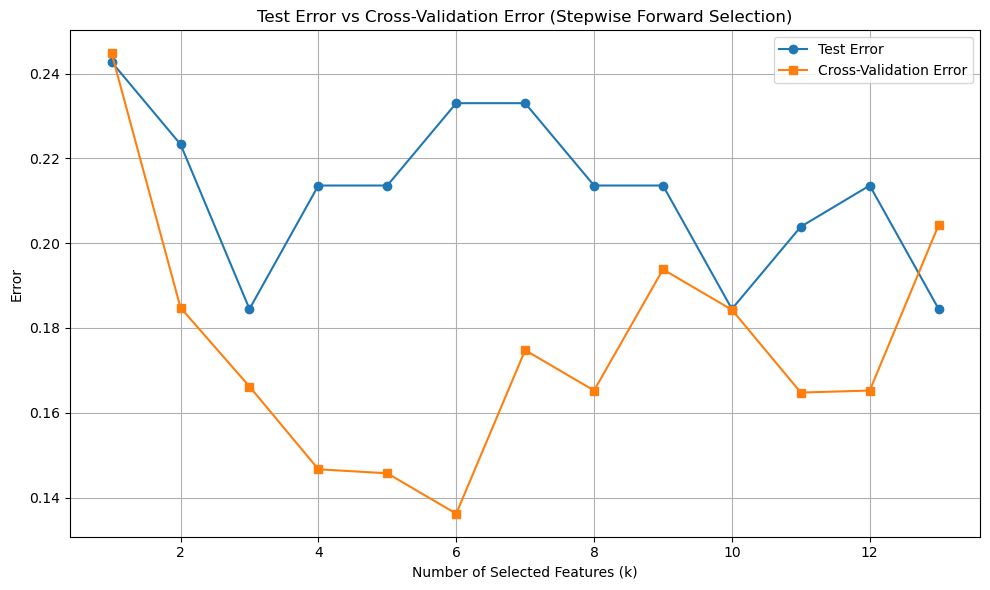

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 14), test_errors, label='Test Error', marker='o')
plt.plot(range(1, 14), cv_errors, label='Cross-Validation Error', marker='s')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('Error')
plt.title('Test Error vs Cross-Validation Error (Stepwise Forward Selection)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Top 2 features: ['cp', 'oldpeak']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


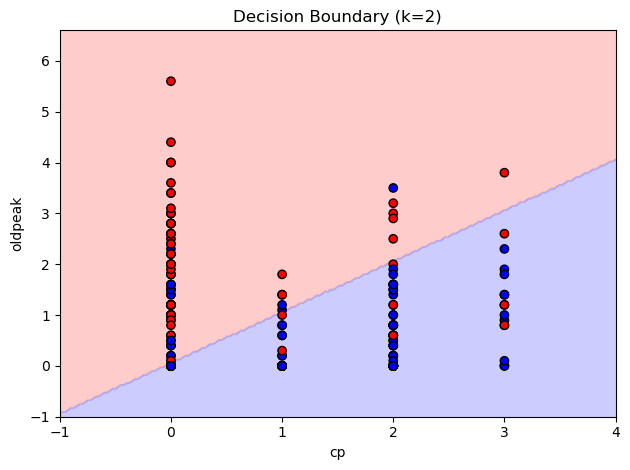

In [31]:
# 找出前两个特征
top2 = selected_features[:2]
print("Top 2 features:", top2)

# 训练模型 & 可视化边界
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # predict
    Z = Z.reshape(xx.shape) # Return the result back

    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']), alpha=0.6) # alpha: transparancy degree
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title("Decision Boundary (k=2)")
    plt.tight_layout()
    plt.show()

model_2 = LogisticRegression(penalty=None, max_iter=1000)
model_2.fit(X_train[top2], y_train)
plot_decision_boundary(X_train[top2], y_train, model_2)


## HW 6

In [68]:
X_train, X_test, y_train, y_test

(array([[58.,  1.,  0., ...,  0.,  3.,  1.],
        [58.,  1.,  0., ...,  2.,  1.,  3.],
        [45.,  0.,  1., ...,  1.,  0.,  2.],
        ...,
        [69.,  1.,  3., ...,  1.,  1.,  2.],
        [46.,  1.,  0., ...,  2.,  0.,  3.],
        [63.,  0.,  1., ...,  2.,  2.,  2.]]),
 array([[57.,  1.,  0., ...,  1.,  1.,  1.],
        [59.,  1.,  3., ...,  1.,  0.,  3.],
        [57.,  1.,  2., ...,  2.,  1.,  3.],
        ...,
        [54.,  1.,  2., ...,  2.,  0.,  3.],
        [58.,  0.,  2., ...,  2.,  0.,  2.],
        [47.,  1.,  0., ...,  2.,  0.,  2.]]),
 291    0
 273    0
 67     1
 108    1
 69     1
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 200, dtype: int64,
 179    0
 228    0
 111    1
 246    0
 60     1
       ..
 68     1
 229    0
 37     1
 16     1
 126    1
 Name: target, Length: 103, dtype: int64)

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


# 不带正则项
clf = LogisticRegression(penalty = None, max_iter=1000)
clf.fit(X_train, y_train)

y_pred_prob = clf.predict_proba(X_train)[:, 1]
L_star = log_loss(y_train, y_pred_prob)

print(f"Sklearn Logistic Loss (L*): {L_star:.4f}")

Sklearn Logistic Loss (L*): 0.3085


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Implement Logistic Regression with Coordinate Descent
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(w, X, y):
    z = X @ w
    pred = sigmoid(z)
    return log_loss(y, pred)

def coordinate_descent(X, y, num_iter=5000, alpha=1e-4):
    n, d = X.shape
    w = np.zeros(d)
    losses = []

    for t in range(num_iter):
        i = np.random.randint(d)  # Rondomly choose the coordinate to update
        pred = sigmoid(X @ w)

        gradient = (pred - y) @ X[:, i] / n # Calculate the average gradient for this coordinate
        w[i] -= alpha * gradient # Update the weight of this coordinate

        # 记录当前 loss
        if t % 10 == 0:
            loss = logistic_loss(w, X, y)
            losses.append(loss)

    return w, losses


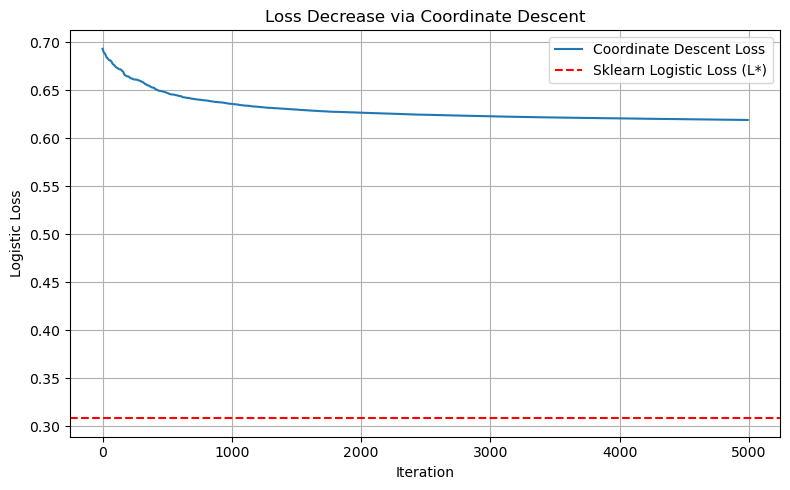

In [128]:
w_cd, loss_curve = coordinate_descent(X_train, y_train)

# 作图
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(loss_curve)) * 10, loss_curve, label="Coordinate Descent Loss")
plt.axhline(y=L_star, color='red', linestyle='--', label="Sklearn Logistic Loss (L*)")
plt.xlabel("Iteration")
plt.ylabel("Logistic Loss")
plt.title("Loss Decrease via Coordinate Descent")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Implement Logistic Regression with Coordinate Descent
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(w, X, y):
    z = X @ w
    pred = sigmoid(z)
    return log_loss(y, pred)

def coordinate_descent(X, y, num_iter=5000):
    n, d = X.shape
    w = np.zeros(d)
    losses = []
    eta = 1e-3  # 初始学习率缩放因子，可调成 1e-2, 1e-3 试试 -- 毫无用处！

    for t in range(num_iter):
        i = np.random.randint(d)  # Rondomly choose the coordinate to update
        pred = sigmoid(X @ w)
        alpha_t = eta / np.sqrt(t + 1)

        gradient = (pred - y) @ X[:, i] / n # Calculate the gradient for this coordinate
        w[i] -= alpha_t * gradient # Update the weight of this coordinate

        # 记录当前 loss
        if t % 10 == 0:
            loss = logistic_loss(w, X, y)
            losses.append(loss)

    return w, losses

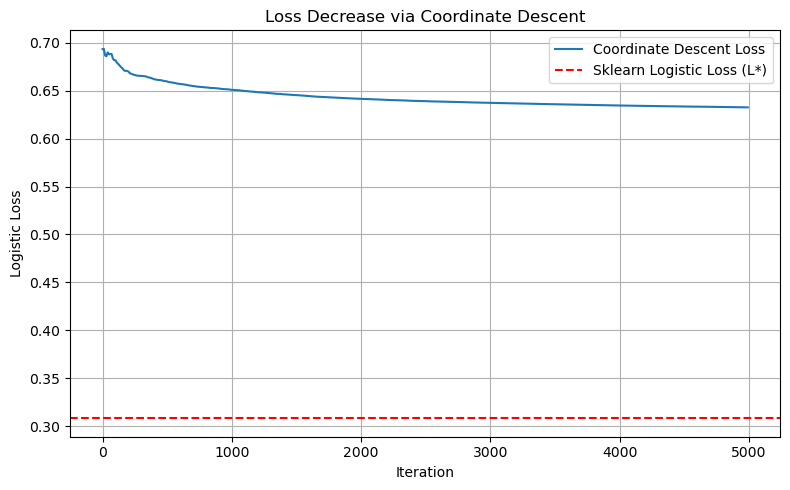

In [138]:
w_cd, loss_curve = coordinate_descent(X_train, y_train)

# 作图
plt.figure(figsize=(8, 5))
plt.plot(np.arange(len(loss_curve)) * 10, loss_curve, label="Coordinate Descent Loss")
plt.axhline(y=L_star, color='red', linestyle='--', label="Sklearn Logistic Loss (L*)")
plt.xlabel("Iteration")
plt.ylabel("Logistic Loss")
plt.title("Loss Decrease via Coordinate Descent")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()